## 步骤 1 - 安装所需的 Python 环境及包

## 步骤 2 - 初步读入并清洗数据

In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv("./tweets.csv")
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           460 non-null    object
 1   label          460 non-null    object
 2   roberta        460 non-null    object
 3   roberta_score  460 non-null    object
 4   gpt2           460 non-null    object
 5   gpt2_score     460 non-null    object
dtypes: object(6)
memory usage: 21.7+ KB
None


,text,label,roberta,roberta_score,gpt2,gpt2_score
0,@user @user what do these '1/2 naked pics' hav...,neutral,0,0.8047260642051697,LABEL_2,0.9134505987167358
1,OH: âI had a blue penis while I was thisâ?[...,neutral,1,0.8669487237930298,LABEL_1,0.7534046173095703
2,"@user @user That's coming, but I think the vic...",neutral,1,0.7637239098548889,LABEL_2,0.9999619722366333
3,I think I may be finally in with the in crowd ...,positive,2,0.7740470767021179,LABEL_2,0.8987836837768555
4,"@user Wow,first Hugo Chavez and now Fidel Cast...",negative,1,0.41639748215675354,LABEL_2,0.9864314198493958


我们可以发现，Roberta 使用 0/1/2 来分别代表 negative/neutral/positive，而 gpt2 使用 LABEL_0/1/2 来代表 negative/neutral/positive。为了方便后续处理，我们需要进行清理。

In [17]:
df.tail()

,text,label,roberta,roberta_score,gpt2,gpt2_score
455,Donnie is gonna deport the Menendez Brothers r...,negative,0,0.915343702,LABEL_1,0.9996317625045776
456,Still reading #SettleForMore @user #fridayreads,neutral,1,0.7972065210342407,LABEL_2,0.9999717473983765
457,#Chocolate cupcake #candle melting with its sw...,positive,2,0.9518568515777588,96,0.9996724128723145
458,Is this leaf ?Can I eat ?Open the leaf!Oh! Thi...,neutral,2,0.6648613214492798,101,0.9995484948158264
459,"""We have lost everything"": Syrians return to r...",neutral,0,0.7519545555114746,LABEL_2,0.9942440390586853


In [18]:
print(df['roberta'].value_counts())
print(df['gpt2'].value_counts().sort_values())

roberta
1                                                   183
0                                                   170
2                                                   103
 considering how many illegal votes were casted"      1
familyRall writers&ACexpert on digi media             1
 gun control                                          1
 but Maduro's just as bad/worse."                     1
Name: count, dtype: int64
gpt2
105                     1
92                      1
93                      1
107                     1
108                     1
103                     1
89                      1
72                      1
38                      1
131                     1
79                      1
113                     1
63                      1
97                      1
0.7893977761268616      1
110                     1
57                      1
0.8704230189323425      1
87                      1
39                      1
95                      1
101                    

In [19]:
# 有噪音，删除
df = df[df['roberta'].isin(['0', '1', '2'])]
df = df[df['gpt2'].isin(['LABEL_0', 'LABEL_1', 'LABEL_2'])]

In [20]:
def label_map_gpt2(x):
    return int(x[-1:])

def label_map_roberta(x):
    return int(x[-1:])  # 提取字符串中的最后一个字符并转换为整数

df['gpt2'] = df['gpt2'].map(label_map_gpt2)
df['roberta'] = df['roberta'].map(label_map_roberta)
df.head(5)

,text,label,roberta,roberta_score,gpt2,gpt2_score
0,@user @user what do these '1/2 naked pics' hav...,neutral,0,0.8047260642051697,2,0.9134505987167358
1,OH: âI had a blue penis while I was thisâ?[...,neutral,1,0.8669487237930298,1,0.7534046173095703
2,"@user @user That's coming, but I think the vic...",neutral,1,0.7637239098548889,2,0.9999619722366333
3,I think I may be finally in with the in crowd ...,positive,2,0.7740470767021179,2,0.8987836837768555
4,"@user Wow,first Hugo Chavez and now Fidel Cast...",negative,1,0.41639748215675354,2,0.9864314198493958


Zeno 处理要求我们增加 input_length 列与 id 列，对数据进行进一步处理

In [21]:
df["input_length"] = df["text"].str.len()
df['id'] = df.index
df.head(5)

,text,label,roberta,roberta_score,gpt2,gpt2_score,input_length,id
0,@user @user what do these '1/2 naked pics' hav...,neutral,0,0.8047260642051697,2,0.9134505987167358,96,0
1,OH: âI had a blue penis while I was thisâ?[...,neutral,1,0.8669487237930298,1,0.7534046173095703,75,1
2,"@user @user That's coming, but I think the vic...",neutral,1,0.7637239098548889,2,0.9999619722366333,87,2
3,I think I may be finally in with the in crowd ...,positive,2,0.7740470767021179,2,0.8987836837768555,83,3
4,"@user Wow,first Hugo Chavez and now Fidel Cast...",negative,1,0.41639748215675354,2,0.9864314198493958,133,4


## 步骤 3 - 启动 Zeno 进行模型分析

创建一个 [Zeno](https://hub.zenoml.com/account) 账号，阅读如下代码并正确运行，运行完成后你将在个人账户下看到创建的 projects

In [ ]:
# !pip -V
# !pip install zeno-client

pip 25.1.1 from E:\Github\isse-labs\.isse-venv\Lib\site-packages\pip (python 3.13)

Looking in indexes: https://mirrors.pku.edu.cn/pypi/web/simple
     ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
     ---------------------------------------- 1.3/1.3 MB 37.4 MB/s eta 0:00:00
  Using cached https://mirrors.pku.edu.cn/pypi/web/packages/4f/c7/e54682c96a895d0c808453269e0b5928a07a127a15704fedb643e9b0a4c8/pandas-2.3.3-cp313-cp313-win_amd64.whl (11.0 MB)
     ---------------------------------------- 0.0/28.0 MB ? eta -:--:--
     ----------------------------- -------- 22.0/28.0 MB 109.4 MB/s eta 0:00:01
     --------------------------------------- 28.0/28.0 MB 92.8 MB/s eta 0:00:00
  Using cached https://mirrors.pku.edu.cn/pypi/web/packages/d0/30/dc54f88dd4a2b5dc8a0279bdd7270e735851848b762aeb1c1184ed1f6b14/tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached https://mirrors.pku.edu.cn/pypi/web/packages/a3/dc/17031897dae0efacfea57dfd3a82fdd2a2aeb58e0ff71b77b87e44edc772/setu


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import os
from dotenv import load_dotenv

print(os.getcwd())

dotenv_path = ".env"
if not os.path.exists(dotenv_path): # 判断是否存在.env文件
    dotenv_path = None
    raise Exception("请在项目根目录下创建.env文件")
load_dotenv(dotenv_path)
API_KEY = os.getenv("DJ_API_KEY")
if API_KEY is None:
    raise Exception("请在.env文件中设置DJ_API_KEY")

e:\Github\isse-labs\lab4-doc


In [35]:
from zeno_client import ZenoClient, ZenoMetric
import pandas as pd

client = ZenoClient(API_KEY)

# 创建项目
proj = client.create_project(
    name="Twitter Sentiment Analysis",
    view="text-classification",
    metrics=[
        ZenoMetric(name="roberta_accuracy", type="mean", columns=["roberta_correct"]),
        #TODO 类比上述方法，为 gpt2 模型创建相应的评估指标
        ZenoMetric(name="gpt2_accuracy", type="mean", columns=["gpt2_correct"]),  # 为 gpt2 创建相应的评估指标
    ]
)

proj.upload_dataset(df, id_column="id", data_column='text', label_column="label")

# 为 Roberta 模型分别创建系统数据框
df_roberta = pd.DataFrame({
    "id": df["id"],
    "output": df["roberta"],
    "roberta_correct": (df["roberta"] == df["label"]).astype(int)
})
proj.upload_system(df_roberta, name="Roberta", id_column="id", output_column="output")
#TODO 类比上述方法，为 gpt2 模型创建系统数据框

# 为 gpt2 模型创建系统数据框
df_gpt2 = pd.DataFrame({
    "id": df["id"],
    "output": df["gpt2"],
    "gpt2_correct": (df["gpt2"] == df["label"]).astype(int)  # 计算 gpt2 模型预测是否正确
})
proj.upload_system(df_gpt2, name="GPT2", id_column="id", output_column="output")


Successfully created project.
Access your project at  https://hub.zenoml.com/project/895c3f02-0a3c-401d-a508-a07c06d5c31f/Twitter%20Sentiment%20Analysis


e:\Github\isse-labs\.isse-venv\Lib\site-packages\zeno_client\util.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '24' '25' '26' '27' '28' '30' '31'
 '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '44' '45' '46'
 '47' '48' '50' '51' '52' '53' '56' '57' '58' '59' '60' '61' '62' '63'
 '65' '66' '68' '69' '70' '71' '72' '73' '74' '75' '76' '77' '78' '79'
 '80' '81' '82' '83' '84' '85' '86' '87' '88' '89' '90' '91' '93' '94'
 '95' '96' '98' '99' '100' '101' '102' '103' '104' '105' '106' '109' '110'
 '111' '112' '113' '114' '115' '117' '118' '119' '120' '121' '122' '123'
 '124' '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135'
 '136' '137' '138' '139' '140' '141' '142' '143' '144' '149' '150' '152'
 '153' '154' '155' '156' '157' '158' '159' '160' '161' '162' '163' '164'
 '165' '166' '16

Successfully uploaded data


100%|██████████| 1/1 [00:01<00:00,  1.15s/it]


Successfully uploaded system


100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

Successfully uploaded system


## 步骤 4 - 创建分析切片并进一步分析

你一共需要利用 Zeno 提供的接口创建 5 个不同的切片。

你可以首先创建两个切片：

1. 有标签的推文（含有"#"）
2. 有强烈正向情感的词语（如 love），你可以自行决定一个词

创建切片可以直接通过点击 "+" 按钮来进行，可以通过基本值匹配或正则表达式的方式创建，具体用法参见[文档](https://zenoml.com/docs/intro/)

![image.png](images/image.png)

有关 Zeno 中更多有趣的用法可以参考 Zeno 仓库中的 [README](https://github.com/zeno-ml/zeno)。

在此处写下你想要另外创建的三个切片，并在个人 Zeno 账户中创建，针对每一个创建的切片，用一两句话总结模型在其上的表现特点：

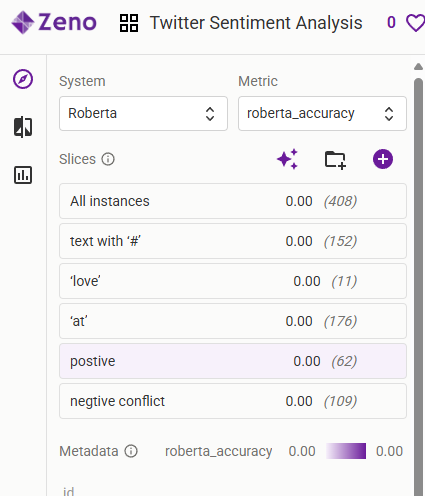

3. 提到其他用户的推文：各类型分布均匀，无明显差异
4. 两个模型都判断positive：基本无误判，有少量中性
5. roberta判定negative，bert判定非negative：gpt2相比bert更倾向于判定positive

## 提交：
1. 本 notebook，保留你书写的代码与输出结果
2. 一张截图，显示你创建的 5 个切片